# Calculation general flare distributions in $\mu$

In [1]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt


In [2]:
# general distribution for area 
def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

sigma_fit, nu_fit = (9.02769086 / 180 * np.pi, 10.48768514 / 180 * np.pi)

def rho(alpha, err=0.001):
    return rice_dist(np.pi / 2 - alpha, sigma_fit, nu_fit) / 2 / np.pi / (np.sin(alpha) + err) / 2 
            # fit of dist when integrated over phi and absolute value so accounting for that

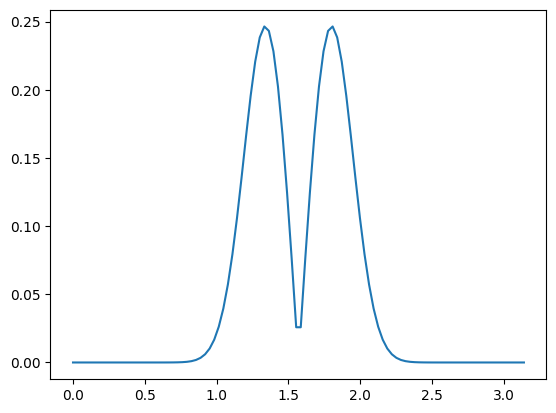

In [3]:
alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))

In [4]:
f = lambda x: rice_dist(x, sigma_fit, nu_fit)

from scipy.integrate import quad

quad(f,0, np.pi)

(1.0, 2.5350408352359244e-09)

Therefore density is $$\rho_\mu(\mu) = \frac{2}{\sin \theta} \int_{[0, 2\pi]}d\phi \rho (\alpha(\theta, \phi))
.$$
where
$$
\cos \alpha = \sin \tau \sin \theta \cos \phi +\cos \theta \cos \tau  $$
and $\mu = \cos \theta$

In [5]:
# general distribution for given tau


def get_alpha(tau, theta, phi):
    return np.arccos( np.sin( tau ) * np.sin(theta) * np.cos(phi) + np.cos(tau) * np.cos(theta))

def rho_mu(mu, tau):
    theta = np.arccos(mu)
    I = lambda phi: rho(get_alpha(tau, theta, phi))
    return 2 * quad(I, 0, 2*np.pi)[0]

def rho_mus(mus, tau):
    return [ rho_mu(mu,tau) for mu in mus]
    


In [6]:
get_alpha(np.pi/2, np.pi/2, np.pi)

3.141592653589793

0.0 (0.9579479708295771, 5.758607278500512e-14)
0.39269908169872414 (0.9251732903678245, 9.599499004860057e-09)
0.7853981633974483 (0.8375356024244044, 9.904521450274289e-09)
1.1780972450961724 (0.7322811999757565, 1.3614437355258246e-09)
1.5707963267948966 (0.687453354883581, 5.638424818460875e-10)


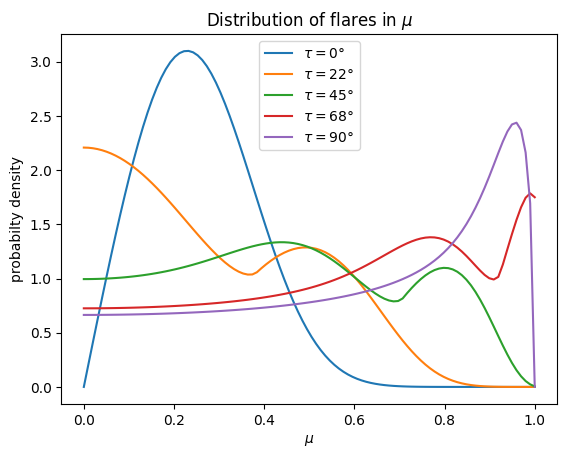

In [ ]:
rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)

# def rho_mus2(mus, tau):
#     return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,1, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

[0.62999651 0.62999651 0.62999651 0.62999651 0.6299965  0.62999651
 0.62999651 0.6299965  0.62999651 0.62999649 0.62999651 0.62999649
 0.62999651 0.62999651 0.6299965  0.62999651 0.62999651 0.62999651
 0.62999651 0.62999651]


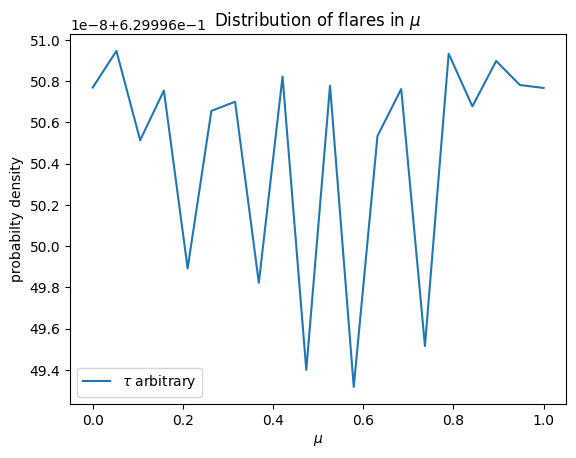

In [23]:
# integration over tau
rho_tau_of_mu = lambda mu : lambda tau : rho_mu(mu, tau) * np.sin(tau)

def rho_mus_arb_tau(mus):
    return [ quad(rho_tau_of_mu(mu), 0, np.pi)[0]  for mu in mus]

mus = np.linspace(0,1, 20)
y =  np.array(rho_mus_arb_tau(mus))/np.pi
print(y)


plt.plot(mus,y, label=fr'$\tau$ arbitrary')

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

In [ ]:
print(np.sum(y)/20)
# y = np.array(y)*np.pi
y, np.sum(y)/20

0.6299965046213619


(array([1.9791924 , 1.97919241, 1.97919239, 1.9791924 , 1.97919237,
        1.9791924 , 1.9791924 , 1.97919237, 1.9791924 , 1.97919236,
        1.9791924 , 1.97919235, 1.97919239, 1.9791924 , 1.97919236,
        1.97919241, 1.9791924 , 1.9791924 , 1.9791924 , 1.9791924 ]),
 1.9791923907057185)

<!-- # Other distributions:
## Normal around the equatator -->

Text(0, 0.5, 'probability density per unit area')

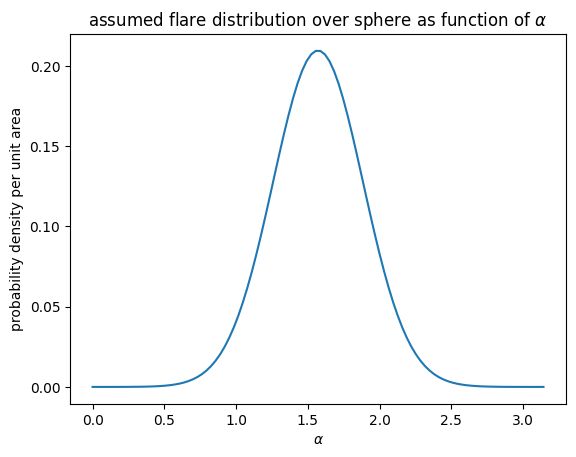

In [19]:
from scipy.stats import norm

def rho(alpha, loc=np.pi/2, scale = 0.3, err = 0.01):
    return norm.pdf(alpha, loc, scale) / 2 / np.pi / (np.sin(alpha) + err) 

alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))
plt.title(r"assumed flare distribution over sphere as function of $\alpha$")
plt.xlabel(r"$\alpha$")
plt.ylabel('probability density per unit area')

0.0 (0.9461015291615257, 6.481888126412584e-10)
0.39269908169872414 (0.9141268025334154, 7.482452435425557e-10)
0.7853981633974483 (0.8290491951458221, 3.404016291064238e-09)
1.1780972450961724 (0.7278832991433314, 4.529296715460873e-09)


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14712\4183348772.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 2 * quad(I, 0, 2*np.pi)[0]


1.5707963267948966 (0.679034559255583, 4.731721792161636e-09)


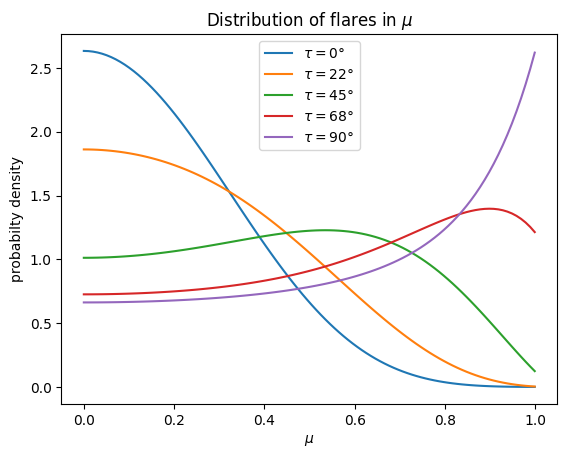

In [22]:
# rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)* (1-mu**2)**0.5

# def rho_mus2(mus, tau):
#     return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

[1.31170265 1.30650718 1.29117119 1.26642548 1.2334223  1.19364376
 1.14878707 1.10063833 1.05094707 1.00131331 0.95309753 0.90735982
 0.86483245 0.82592423 0.7907536  0.75920281 0.73098424 0.70571014
 0.68295648 0.66231602]


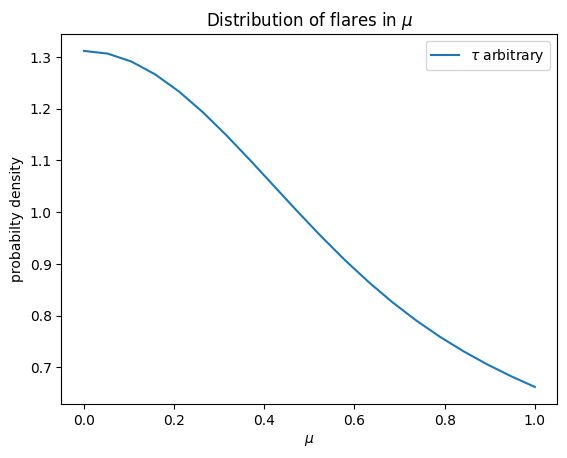

In [21]:
# integration over tau
rho_tau_of_mu = lambda mu : lambda tau : rho_mu(mu, tau)

def rho_mus_arb_tau(mus):
    return [ quad(rho_tau_of_mu(mu), 0, np.pi)[0]  for mu in mus]

mus = np.linspace(0,1, 20)
y =  np.array(rho_mus_arb_tau(mus))/np.pi
print(y)


plt.plot(mus,y, label=fr'$\tau$ arbitrary')

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

## uniform distribution

Text(0, 0.5, 'probability density per unit area')

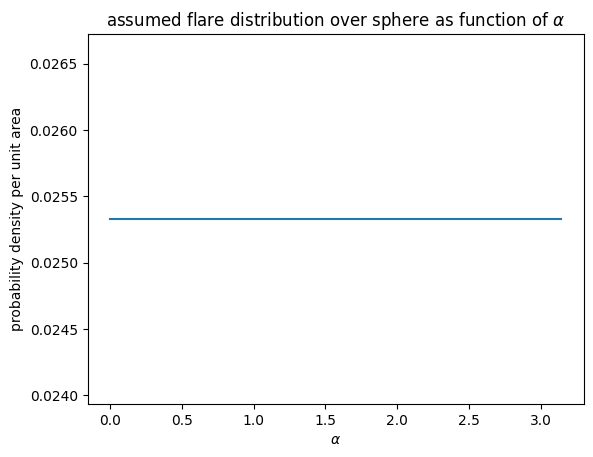

In [11]:
def rho(alpha, loc=np.pi/2, scale = 0.5):
    return alpha * 0 + 1 / np.pi**2 / 4 

alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))
plt.title(r"assumed flare distribution over sphere as function of $\alpha$")
plt.xlabel(r"$\alpha$")
plt.ylabel('probability density per unit area')

0.0 (0.3183098861837907, 3.5339496460705744e-15)
0.39269908169872414 (0.3183098861837907, 3.5339496460705744e-15)
0.7853981633974483 (0.3183098861837907, 3.5339496460705744e-15)
1.1780972450961724 (0.3183098861837907, 3.5339496460705744e-15)
1.5707963267948966 (0.3183098861837907, 3.5339496460705744e-15)


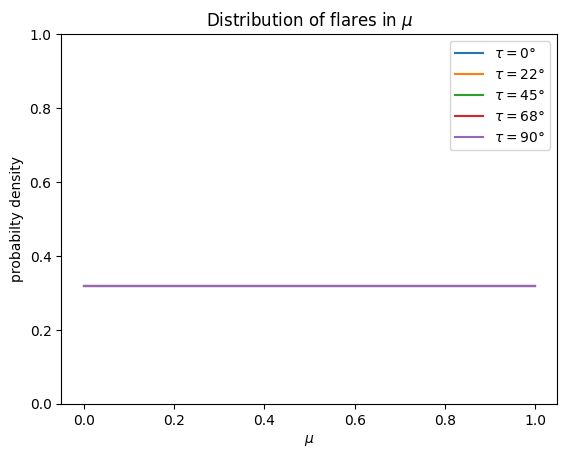

In [ ]:
# rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)* (1-mu**2)**0.5

# def rho_mus2(mus, tau):
#     return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))

plt.ylim(0,1)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

Text(0, 0.5, 'probability density per unit area')

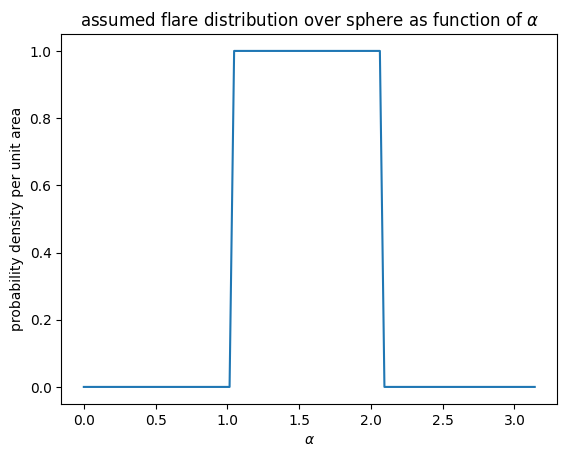

In [15]:
def rho(alpha, h=30/180*np.pi):
    return np.where(np.abs(alpha-np.pi/2) < h, 1, 0)


alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))
plt.title(r"assumed flare distribution over sphere as function of $\alpha$")
plt.xlabel(r"$\alpha$")
plt.ylabel('probability density per unit area')

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13372\4038941018.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 2 / np.sin(theta) * quad(I, 0, 2*np.pi)[0]


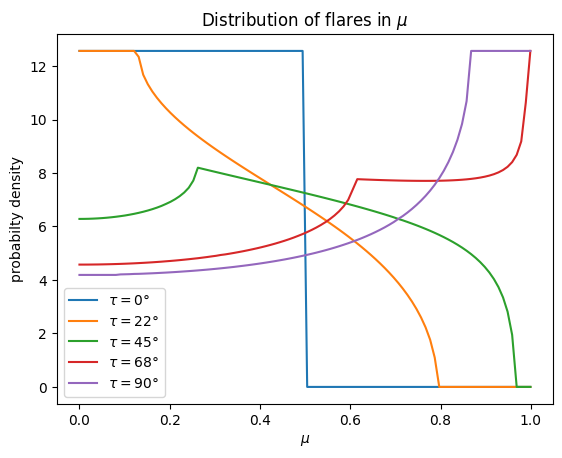

In [ ]:
# rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)* (1-mu**2)**0.5

# def rho_mus2(mus, tau):
#     return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    # print(tau, quad(rho_mu_of_tau(tau), 0, 1))

# plt.ylim(0,1)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

In [ ]:
# integration over tau
rho_tau_of_mu = lambda mu : lambda tau : rho_mu(mu, tau)

def rho_mus_arb_tau(mus):
    return [ quad(rho_tau_of_mu(mu), 0, np.pi)[0]  for mu in mus]

mus = np.linspace(0,1, 20)
y =  np.array(rho_mus_arb_tau(mus))/np.pi
print(y)


plt.plot(mus,y, label=fr'$\tau$ arbitrary')

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()